# Importing data

In [1]:
import pandas as pd
df=pd.read_csv('mushrooms.csv',na_values='?')
pd.set_option('display.max_columns',100)
df=df.drop(columns='veil-type')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,w,o,e,w,v,l


# Data cleaning

In [2]:
df.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [3]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
# group of df
col_list=[]
cols=df.columns
print(cols)
for x in cols:
    x=df[x].groupby(df[x]).first()
    x=[x]
    col_list.append(x)
    
print(col_list)    

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')
[[class
e    e
p    p
Name: class, dtype: object], [cap-shape
b    b
c    c
f    f
k    k
s    s
x    x
Name: cap-shape, dtype: object], [cap-surface
f    f
g    g
s    s
y    y
Name: cap-surface, dtype: object], [cap-color
b    b
c    c
e    e
g    g
n    n
p    p
r    r
u    u
w    w
y    y
Name: cap-color, dtype: object], [bruises
f    f
t    t
Name: bruises, dtype: object], [odor
a    a
c    c
f    f
l    l
m    m
n    n
p    p
s    s
y    y
Name: odor, dtype: object], [gill-attachment
a    a
f    f
Name: gill-attachment, dtype: object], [gill-spacing
c    c
w    w
Nam

In [5]:
df['stalk-root'].isna().sum()
df['stalk-root'].groupby(df['stalk-root']).count()

stalk-root
b    3776
c     556
e    1120
r     192
Name: stalk-root, dtype: int64

In [6]:
df['stalk-root']=df['stalk-root'].fillna('aa')

In [7]:
cols=df.columns

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
print(df)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  \
0                   1             0          1           4            0   
1                   1             0          0           4           

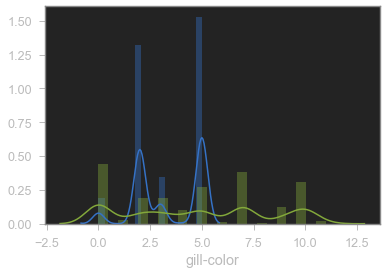

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.distplot(df['cap-shape'])
#sns.distplot(df['class'])
sns.distplot(df['gill-color'])
#fig,a=plt.subplots(2,2)
#a[0][0].plot(df['class'])
#a[0][1].plot(df['cap-shape'])
#a[1][0].plot(df['gill-color'])
#a[1][1].plot(df['gill-size'])
    

In [10]:
group=[]
for col in cols:
    col=df[col].groupby(df[col]).sum()
    col=[col]
    group.append(col)
print(group)

[[class
0       0
1    3916
Name: class, dtype: int32], [cap-shape
0        0
1        4
2     6304
3     2484
4      128
5    18280
Name: cap-shape, dtype: int32], [cap-surface
0       0
1       4
2    5112
3    9732
Name: cap-surface, dtype: int32], [cap-color
0       0
1      44
2    3000
3    5520
4    9136
5     720
6      96
7     112
8    8320
9    9648
Name: cap-color, dtype: int32], [bruises
0       0
1    3376
Name: bruises, dtype: int32], [odor
0        0
1      192
2     4320
3     1200
4      144
5    17640
6     1536
7     4032
8     4608
Name: odor, dtype: int32], [gill-attachment
0       0
1    7914
Name: gill-attachment, dtype: int32], [gill-spacing
0       0
1    1312
Name: gill-spacing, dtype: int32], [gill-size
0       0
1    2512
Name: gill-size, dtype: int32], [gill-color
0         0
1        96
2      1504
3      2196
4      1632
5      5240
6       384
7     10444
8       192
9      4428
10    12020
11      946
Name: gill-color, dtype: int32], [stalk-shape
0    

In [11]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [12]:
#Spliting data
x=df.drop(columns='class')
y=df['class']
from sklearn.model_selection import train_test_split
X_tain,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

In [13]:
#SMOTE scaling for imbalanced data handling
def makeOverSamplesSMOTE(x,y):
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    x,y=sm.fit_sample(x,y)
    return x,y

In [14]:
makeOverSamplesSMOTE(x,y)

(      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
 0             5            2          4        1     6                1   
 1             5            2          9        1     0                1   
 2             0            2          8        1     3                1   
 3             5            3          8        1     6                1   
 4             5            2          3        0     5                1   
 ...         ...          ...        ...      ...   ...              ...   
 8411          3            2          2        0     2                1   
 8412          2            3          4        0     2                1   
 8413          2            3          4        0     8                1   
 8414          2            3          3        0     2                1   
 8415          2            3          3        0     2                1   
 
       gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
 0             

In [15]:
# sampling using ADASYN
def makeOverSamplesADASYN(x,y):
    from imblearn.over_sampling import ADASYN
    sm=ADASYN()
    x,y=sm.fit_sample(x,y)
    return x,y
    

In [16]:
makeOverSamplesADASYN(x,y)

(      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
 0             5            2          4        1     6                1   
 1             5            2          9        1     0                1   
 2             0            2          8        1     3                1   
 3             5            3          8        1     6                1   
 4             5            2          3        0     5                1   
 ...         ...          ...        ...      ...   ...              ...   
 8413          0            1          4        0     5                1   
 8414          1            2          4        0     5                1   
 8415          0            0          4        0     5                1   
 8416          0            0          4        0     5                1   
 8417          0            0          4        0     5                1   
 
       gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
 0             

In [17]:
# Scaling the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn import preprocessing
x_scaled=preprocessing.scale(xtrain)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=[]
for i in range(1,10):
    print("for i: ",i)
    lr=LogisticRegression(random_state=i,max_iter=500)
    lr.fit(xtrain,ytrain)
    lr_pred=lr.predict(xtest)
    lr_acc=accuracy_score(lr_pred,ytest)
    ac.append(lr_acc)
    print("Accuracy score: ",lr_acc)
    lr_cm=confusion_matrix(ytest,lr_pred)
    print("Confusion matrix:\n",lr_cm)
    lr_cr=classification_report(ytest,lr_pred)
    print("Classification report:\n",lr_cr)


for i:  1
Accuracy score:  0.947316592811423
Confusion matrix:
 [[1019   42]
 [  65  905]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1061
           1       0.96      0.93      0.94       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

for i:  2
Accuracy score:  0.947316592811423
Confusion matrix:
 [[1019   42]
 [  65  905]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1061
           1       0.96      0.93      0.94       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

for i:  3
Accuracy score:  0.947316592811423
Confusion matrix:
 [[1019   42]
 [  65  905]]
Classification report:
  

In [19]:
print("Accuracy score: ",max(ac))

Accuracy score:  0.947316592811423


In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr=LogisticRegression(random_state=1,max_iter=500)
lr.fit(xtrain,ytrain)
lr_pred=lr.predict(xtest)
#RMSE for training
lr_pred_train=lr.predict(xtrain)
lr_rmse_train=np.sqrt(mean_squared_error(ytrain,lr_pred_train))
print("RMSE for train: ",lr_rmse_train)
#RMSE for test
lr_pred_test=lr.predict(xtest)
lr_rmse_test=np.sqrt(mean_squared_error(ytest,lr_pred_test))
print("RMSE for test: ",lr_rmse_test)
print("R^2 score: ",r2_score(ytest,lr_pred))
lr_acc1=accuracy_score(lr_pred,ytest)
print("Accuracy: ",lr_acc1)

RMSE for train:  0.22519754444187207
RMSE for test:  0.22952866310893952
R^2 score:  0.7888424652875619
Accuracy:  0.947316592811423


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
acc=[]
for i in range(1,20):
    print("i=",i)
    dt=DecisionTreeClassifier(random_state=i)
    dt.fit(x_scaled,ytrain)
    dt_predt=dt.predict(xtest)
    dt_acc=accuracy_score(dt_predt,ytest)
    acc.append(dt_acc)
    print("Accuracy score: ",dt_acc)
    dt_cm=confusion_matrix(ytest,dt_predt)
    print("Confusion matrix:\n",dt_cm)
    dt_cr=classification_report(ytest,dt_predt)
    print("Classification report:\n",dt_cr)

i= 1
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]


C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 2
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 3
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69  

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 5
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 6
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69  

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 11
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 12
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               pr

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 14
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 15
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recal

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 17
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031

i= 18
Accuracy score:  0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recal

C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MaheshHiremath\Anaconda3-2019.10\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

 0.5224027572624323
Confusion matrix:
 [[1061    0]
 [ 970    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      1061
           1       0.00      0.00      0.00       970

    accuracy                           0.52      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.27      0.52      0.36      2031



In [22]:
print("Accuracy score: ",max(acc))

Accuracy score:  0.5224027572624323


In [23]:
# as confusion matrix has TN and FN as 0 decision tree model is biased

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
acc_r=[]
for i in range(1,10):
    print("for i: ",i)
    ran=RandomForestClassifier(n_estimators=500,random_state=i)
    ran.fit(xtrain,ytrain)
    ran_predt=ran.predict(xtest)
    ran_acc=accuracy_score(ran_predt,ytest)
    acc_r.append(ran_acc)
    print("Accuracy score: ",ran_acc)
    ran_cm=confusion_matrix(ran_predt,ytest)
    print("Confusion matrix:\n",ran_cm)
    ran_cr=classification_report(ran_predt,ytest)
    print('Classification report:\n',ran_cr)


for i:  1
Accuracy score:  1.0
Confusion matrix:
 [[1061    0]
 [   0  970]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

for i:  2
Accuracy score:  1.0
Confusion matrix:
 [[1061    0]
 [   0  970]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

for i:  3
Accuracy score:  1.0
Confusion matrix:
 [[1061    0]
 [   0  970]]
Classification report:
               precision    recall  f1-score

In [25]:
# Have to scale the Random Forest as it is overfitting
from sklearn.ensemble import RandomForestClassifier
acc_r=[]
for i in range(1,50):
    print("for i: ",i)
    ran=RandomForestClassifier(n_estimators=500,random_state=i)
    ran.fit(x_scaled,ytrain)
    ran_predt=ran.predict(xtest)
    ran_acc=accuracy_score(ran_predt,ytest)
    acc_r.append(ran_acc)
    print("Accuracy score: ",ran_acc)
    ran_cm=confusion_matrix(ran_predt,ytest)
    print("Confusion matrix:\n",ran_cm)
    ran_cr=classification_report(ran_predt,ytest)
    print('Classification report:\n',ran_cr)

for i:  1
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  2
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  3
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
  

Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  21
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  22
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
          

Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  40
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80      1439
           1       0.55      0.91      0.69       592

    accuracy                           0.76      2031
   macro avg       0.75      0.80      0.75      2031
weighted avg       0.83      0.76      0.77      2031

for i:  41
Accuracy score:  0.758739537173806
Confusion matrix:
 [[1005  434]
 [  56  536]]
Classification report:
          

In [26]:
print("Accuracy max: ",max(acc_r))

Accuracy max:  0.7646479566715904


In [27]:
print(max(acc_r))
print(min(acc_r))

0.7646479566715904
0.758739537173806


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=10,weights='distance')
kn.fit(xtrain,ytrain)
kn_pred=kn.predict(xtest)
kn_acc=accuracy_score(kn_pred,ytest)
print("Accuracy score: ",kn_acc)
kn_cr=classification_report(kn_pred,ytest)
print("Classification report:\n",kn_cr)
kn_cm=confusion_matrix(kn_pred,ytest)
print("Confusion matrix:\n",kn_cm)

Accuracy score:  0.9970457902511078
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      0.99      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Confusion matrix:
 [[1056    1]
 [   5  969]]


In [29]:
# Error rate for K-value
error=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    kn.fit(xtrain,ytrain)
    kn_predt=kn.predict(xtest)
    error.append(np.mean(kn_predt!=ytest))    
print("error: ",error)

error:  [0.0004923682914820286, 0.0004923682914820286, 0.0009847365829640572, 0.0019694731659281144, 0.0019694731659281144, 0.0029542097488921715, 0.002461841457410143, 0.002461841457410143, 0.0019694731659281144, 0.0029542097488921715, 0.0014771048744460858, 0.0029542097488921715, 0.002461841457410143, 0.0034465780403741997, 0.0029542097488921715, 0.003938946331856229, 0.003938946331856229, 0.004431314623338257, 0.003938946331856229, 0.004431314623338257, 0.004431314623338257, 0.0054160512063023145, 0.0054160512063023145, 0.005908419497784343, 0.0054160512063023145, 0.006400787789266372, 0.006400787789266372, 0.006893156080748399, 0.006400787789266372, 0.007385524372230428, 0.007385524372230428, 0.008370260955194485, 0.0103397341211226, 0.0103397341211226, 0.011324470704086657, 0.011324470704086657, 0.012801575578532743, 0.012801575578532743, 0.014771048744460856]


Text(0, 0.5, 'Mean errors')

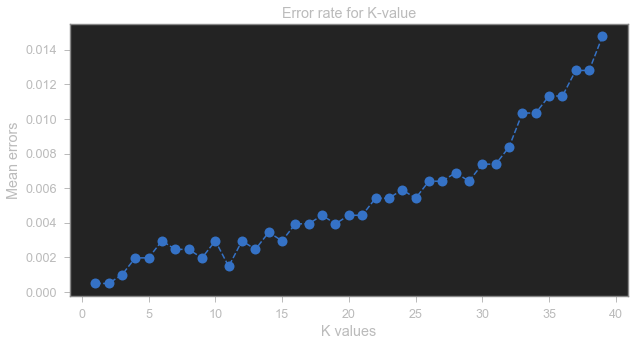

In [30]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error,linestyle='dashed',marker='o',markersize=10)
plt.title("Error rate for K-value")
plt.xlabel("K values")
plt.ylabel("Mean errors")

for k value 1,2 KNN gives more accuracy and less error rate

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=11,weights='distance')
kn.fit(xtrain,ytrain)
kn_pred=kn.predict(xtest)
kn_acc1=accuracy_score(kn_pred,ytest)
print("Accuracy score: ",kn_acc1)
kn_cr=classification_report(kn_pred,ytest)
print("Classification report:\n",kn_cr)
kn_cm=confusion_matrix(kn_pred,ytest)
print("Confusion matrix:\n",kn_cm)

Accuracy score:  0.9985228951255539
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       973

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Confusion matrix:
 [[1058    0]
 [   3  970]]


# SVM

In [32]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=0.001)
sv.fit(xtrain,ytrain)
sv_predt=sv.predict(xtest)
sv_acc=accuracy_score(sv_predt,ytest)
print("Accuracy score: ",sv_acc)

Accuracy score:  0.9103889709502708


In [33]:
df1={"Algorithms":['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'],
    "Accuracy":[max(ac),max(acc),max(acc_r),kn_acc1,sv_acc]}
df1=pd.DataFrame(df1)
print(df1.sort_values(by='Accuracy',ascending=False).reset_index())

   index           Algorithms  Accuracy
0      3                  KNN  0.998523
1      0  Logistic Regression  0.947317
2      4                  SVM  0.910389
3      2        Random Forest  0.764648
4      1        Decision Tree  0.522403
